In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/Advait0801/SPPU-COMP-2019-Assignments/refs/heads/ML/Uber%20Price%20Prediction/uber.csv')
ds

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
ds = ds.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)
ds.dropna(inplace=True)
ds

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


<Axes: ylabel='fare_amount'>

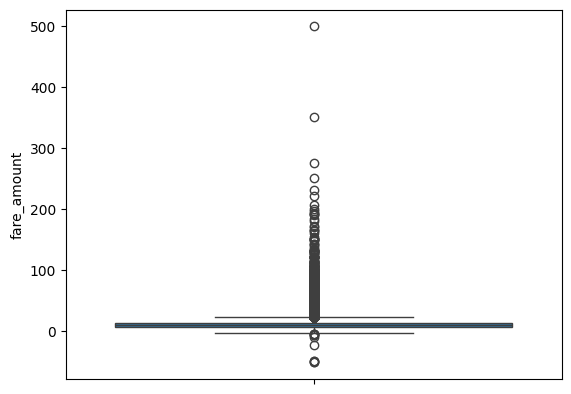

In [4]:
sns.boxplot(ds['fare_amount'])

In [5]:
low = ds['fare_amount'].quantile(0.05)
high = ds['fare_amount'].quantile(0.95)

ds = ds[(ds['fare_amount'] > low) & (ds['fare_amount'] < high)]
ds

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199993,9.5,-73.987798,40.721210,-73.980960,40.744388,1
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


<Axes: ylabel='fare_amount'>

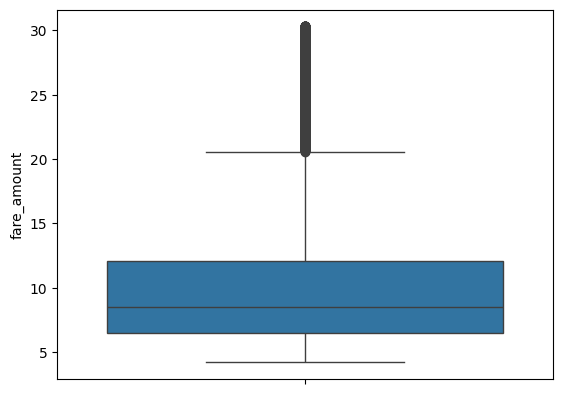

In [6]:
sns.boxplot(ds['fare_amount'])

<Axes: >

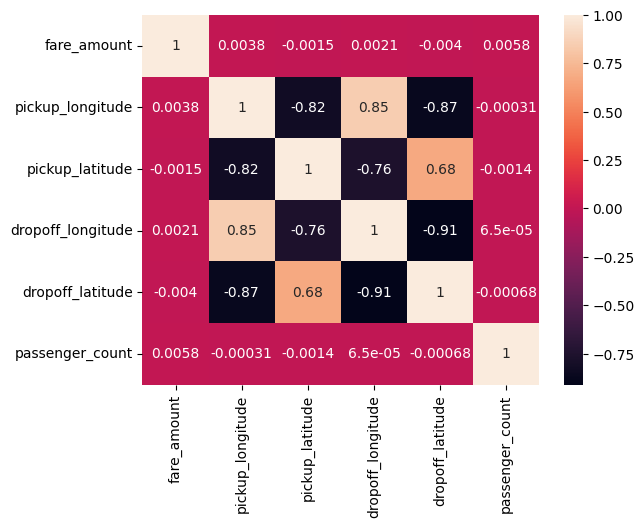

In [7]:
corr = ds.corr()
sns.heatmap(corr, annot=True)

In [8]:
from sklearn.model_selection import train_test_split

X = ds.drop(['fare_amount'], axis=1)
y = ds['fare_amount']
X_train, x_test, y_train, y_test = train_test_split(X, y)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([10.00236882, 10.00210271, 10.00219794, ..., 10.0961275 ,
       10.07309677, 10.02586989])

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  5.158442649854045
R2 ->  1.5977089539265243e-05


In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([ 8.06 , 13.39 ,  7.179, ...,  6.815, 22.662,  8.011])

In [12]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  2.6299283926412405
R2 ->  0.7400776076888465
